In [1]:
# import some usefull library that i use in all over the project or assingment
import numpy as np
import pandas as pd 

In [2]:
# load the dataset using pandas library that is very helpfull to load the data like .csv,.exel files in the python program 
df=pd.read_csv("Food_Delivery_Time_Prediction.csv")
print(df.head())

  Order_ID       Customer_Location     Restaurant_Location  Distance  \
0  ORD0001  (17.030479, 79.743077)  (12.358515, 85.100083)      1.57   
1  ORD0002  (15.398319, 86.639122)  (14.174874, 77.025606)     21.32   
2  ORD0003  (15.687342, 83.888808)  (19.594748, 82.048482)      6.95   
3  ORD0004  (20.415599, 78.046984)  (16.915906, 78.278698)     13.79   
4  ORD0005  (14.786904, 78.706532)  (15.206038, 86.203182)      6.72   

  Weather_Conditions Traffic_Conditions  Delivery_Person_Experience  \
0              Rainy             Medium                           4   
1             Cloudy             Medium                           8   
2              Snowy             Medium                           9   
3             Cloudy                Low                           2   
4              Rainy               High                           6   

  Order_Priority Order_Time Vehicle_Type  Restaurant_Rating  Customer_Rating  \
0         Medium  Afternoon          Car                4.1 

In [3]:
# .info method tell about the how rows columns and telling in breif how the data is present in the dataset that we load in our program
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    object 
 5   Traffic_Conditions          200 non-null    object 
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    object 
 8   Order_Time                  200 non-null    object 
 9   Vehicle_Type                200 non-null    object 
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non

In [4]:
# Checking the null vlaue that are present in the program 
# Its create the error or wrong prediction in our program of model prediction 
df.isna().sum()

Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64

In [5]:
# all the values is present in this columns are greater than zero 
df=df[df["Distance"]>0]
df=df[df["Delivery_Time"]>0]
df=df[df["Order_Cost"]>0]

In [6]:
# .columns method is print only the columns that are present in the dataset
print(df.columns)

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount'],
      dtype='object')


In [7]:
# it is checking for uniquie item present in the columns "Vehicle_Type"
print("unique vehicle types", df["Vehicle_Type"].unique())
print("count", df["Vehicle_Type"].nunique())

# it is checking for uniquie item present in the columns "Wheather_Conditions"
print("unique wheather", df["Weather_Conditions"].unique())
print("count", df["Weather_Conditions"].nunique())

# it is checking for uniquie item present in the columns "Traffic_Conditions"
print("unique Traffic condition", df["Traffic_Conditions"].unique())
print("count", df["Traffic_Conditions"].nunique())

unique vehicle types ['Car' 'Bike' 'Bicycle']
count 3
unique wheather ['Rainy' 'Cloudy' 'Snowy' 'Sunny']
count 4
unique Traffic condition ['Medium' 'Low' 'High']
count 3


In [8]:
# WE want to predict the divelery time prediction using the data that are present in the columns like above☝️.
# so we doesnot predict the value using the string or charachter like data we only need is numeric data .
# below two to three codes are encodes the numeric values for prediction

In [9]:
Vehicle_map={'Car':0,'Bike':1,'Bicycle':2}
df['Vehicle_Type_en']=df["Vehicle_Type"].map(Vehicle_map)

In [10]:
Weather_map = {'Sunny': 0, 'Rainy': 1, 'Snowy': 2,'Cloudy':3}
df['Weather_Condition_en'] = df['Weather_Conditions'].map(Weather_map)

In [11]:
Traffic_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['Traffic_Condition_en'] = df['Traffic_Conditions'].map(Traffic_map)

In [12]:
# check that encoding is get correct  value or not in the data set
print(df.head())

  Order_ID       Customer_Location     Restaurant_Location  Distance  \
0  ORD0001  (17.030479, 79.743077)  (12.358515, 85.100083)      1.57   
1  ORD0002  (15.398319, 86.639122)  (14.174874, 77.025606)     21.32   
2  ORD0003  (15.687342, 83.888808)  (19.594748, 82.048482)      6.95   
3  ORD0004  (20.415599, 78.046984)  (16.915906, 78.278698)     13.79   
4  ORD0005  (14.786904, 78.706532)  (15.206038, 86.203182)      6.72   

  Weather_Conditions Traffic_Conditions  Delivery_Person_Experience  \
0              Rainy             Medium                           4   
1             Cloudy             Medium                           8   
2              Snowy             Medium                           9   
3             Cloudy                Low                           2   
4              Rainy               High                           6   

  Order_Priority Order_Time Vehicle_Type  Restaurant_Rating  Customer_Rating  \
0         Medium  Afternoon          Car                4.1 

In [13]:
numeric=df.select_dtypes(include=["int64", "float64"]).columns

In [14]:
# itgives us the mean, mode, median, and varience
des_stats=pd.DataFrame({
    "mean": df[numeric].mean(),
    "median": df[numeric].median(),
    "variance": df[numeric].var()
})
print(des_stats)

                                  mean    median       variance
Distance                      11.49805    10.265      46.809617
Delivery_Person_Experience     5.25000     5.000       7.535176
Restaurant_Rating              3.73850     3.800       0.494239
Customer_Rating                3.68650     3.700       0.485897
Delivery_Time                 70.49495    72.775     889.870323
Order_Cost                  1046.48870  1035.950  300927.862112
Tip_Amount                    46.61665    47.530     862.109808
Vehicle_Type_en                1.03500     1.000       0.657060
Weather_Condition_en           1.39500     1.000       1.194950
Traffic_Condition_en           0.85000     1.000       0.640704


In [15]:
mode_stats=df[numeric].mode().iloc[0]
print("Mode :\n", mode_stats)

Mode :
 Distance                         1.32
Delivery_Person_Experience       8.00
Restaurant_Rating                3.80
Customer_Rating                  2.60
Delivery_Time                   66.84
Order_Cost                    1813.25
Tip_Amount                       2.22
Vehicle_Type_en                  1.00
Weather_Condition_en             1.00
Traffic_Condition_en             0.00
Name: 0, dtype: float64


In [16]:
# it shows correlation matrix
corr_mat=df[numeric].corr()
corr_mat

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Vehicle_Type_en,Weather_Condition_en,Traffic_Condition_en
Distance,1.000000,0.017562,0.064676,0.003430,-0.075143,-0.022275,-0.006466,0.137676,0.072971,0.134181
Delivery_Person_Experience,0.017562,1.000000,-0.004492,-0.122447,-0.019098,0.061015,-0.069218,-0.003952,0.002093,-0.053745
Restaurant_Rating,0.064676,-0.004492,1.000000,0.101661,-0.091855,-0.106870,-0.035759,-0.093203,0.070349,-0.026299
Customer_Rating,0.003430,-0.122447,0.101661,1.000000,-0.021952,0.142336,-0.074884,-0.088984,-0.023962,-0.018958
Delivery_Time,-0.075143,-0.019098,-0.091855,-0.021952,1.000000,-0.009307,-0.029154,0.055576,-0.010518,-0.055840
Order_Cost,-0.022275,0.061015,-0.106870,0.142336,-0.009307,1.000000,0.034462,-0.030383,0.016125,-0.032744
Tip_Amount,-0.006466,-0.069218,-0.035759,-0.074884,-0.029154,0.034462,1.000000,0.041956,0.047018,0.152003
Vehicle_Type_en,0.137676,-0.003952,-0.093203,-0.088984,0.055576,-0.030383,0.041956,1.000000,0.080729,-0.022847
Weather_Condition_en,0.072971,0.002093,0.070349,-0.023962,-0.010518,0.016125,0.047018,0.080729,1.000000,0.010625
Traffic_Condition_en,0.134181,-0.053745,-0.026299,-0.018958,-0.055840,-0.032744,0.152003,-0.022847,0.010625,1.000000


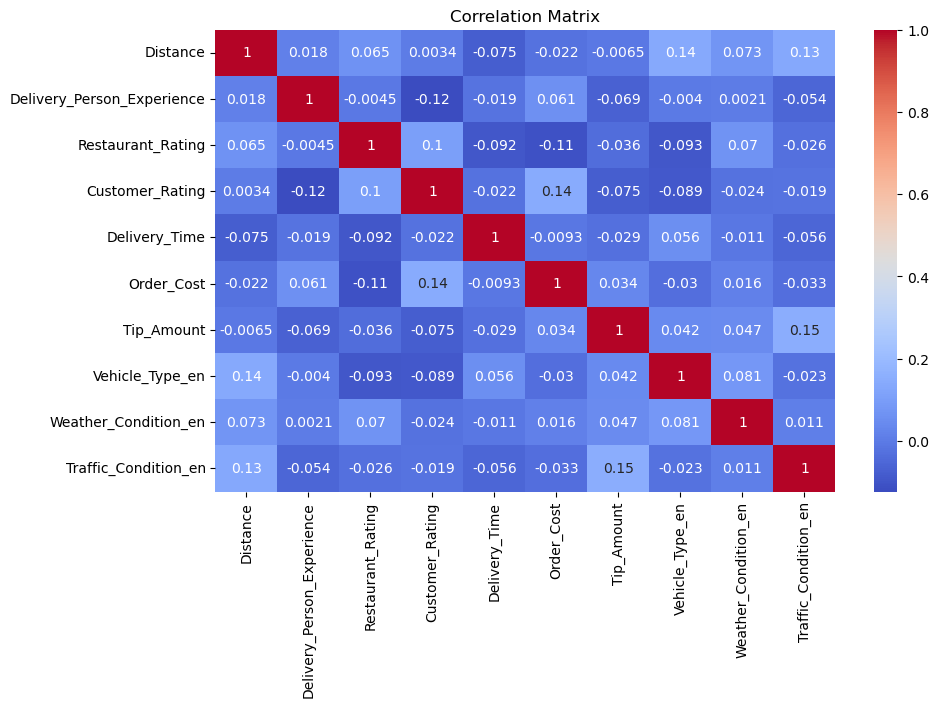

In [17]:
# this code tell about the how the correlation matrics is form or created
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


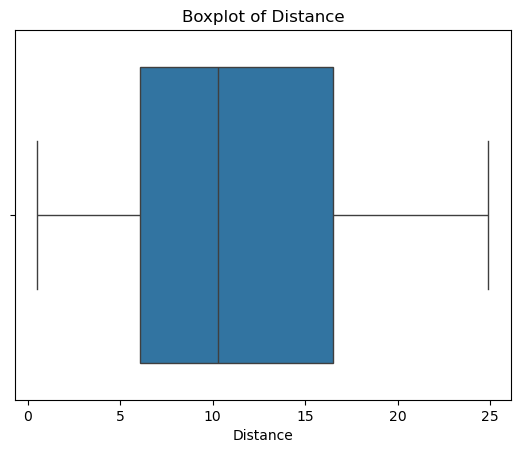

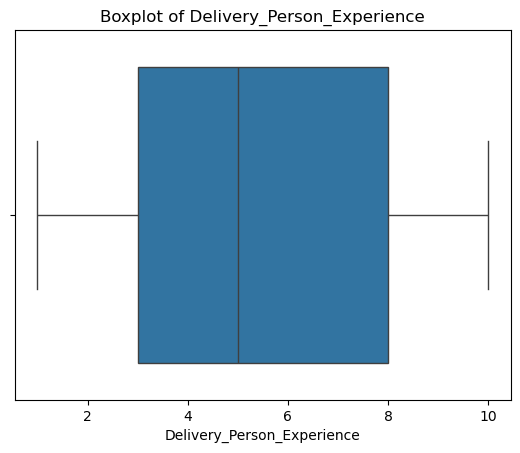

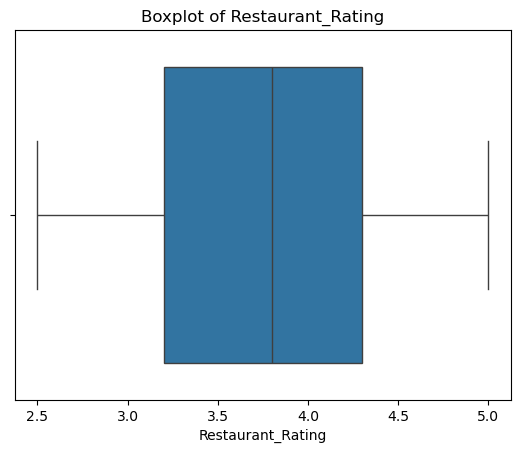

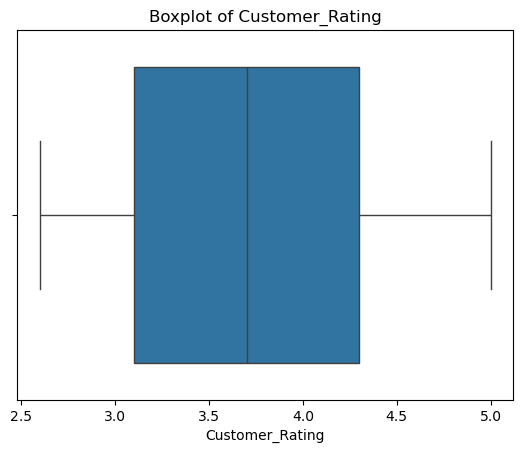

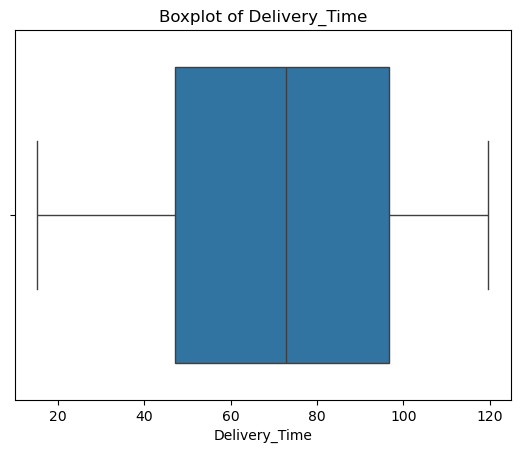

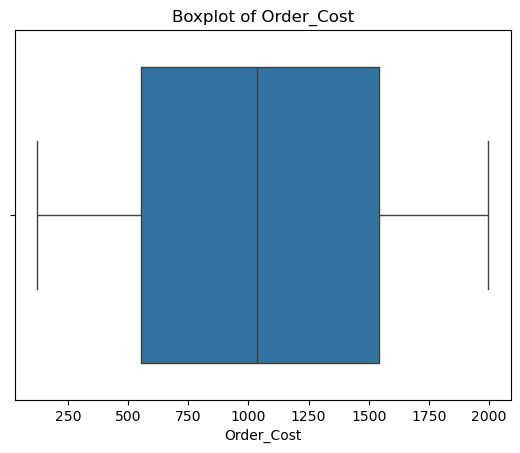

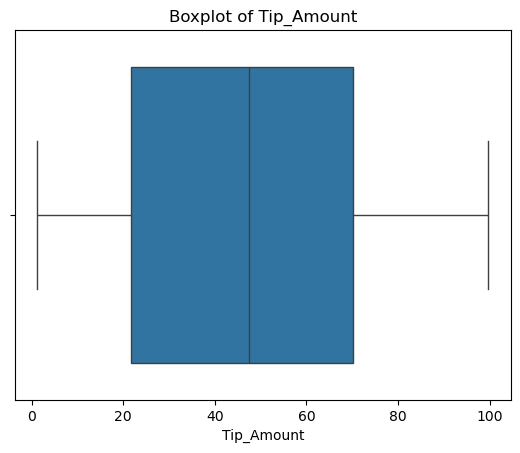

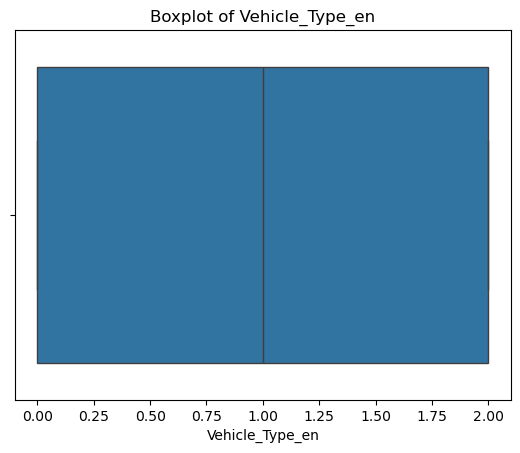

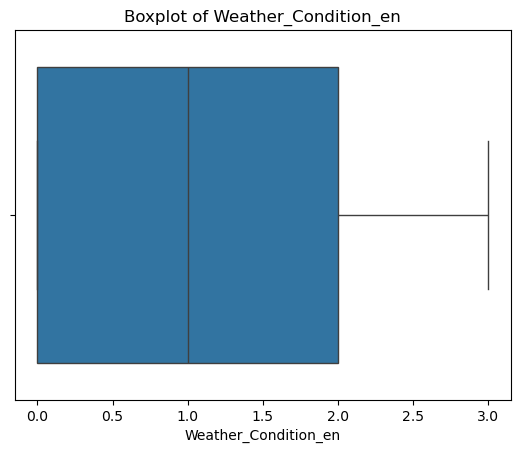

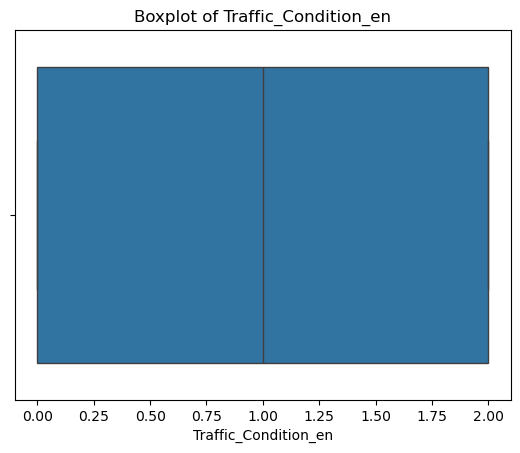

In [18]:
# this code is for poltting the box plot
for col in numeric:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show

In [19]:
Q1=df[numeric].quantile(0.25)
Q3=df[numeric].quantile(0.75)
IQR = Q3-Q1
df_no_outliers = df[~((df[numeric] < (Q1 - 1.5 * IQR)) | 
                      (df[numeric] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [20]:
def haversine(lat1,lon1, lat2, lon2):
    '''
    claculate distance between two points on earth on earth (in kilometers)
    '''
    r=6371
    lat1, lon1, lat2, lon2= map(np.radians,[lat1,lon1,lat2,lon2])
    dlat=lat2-lat1
    dlon=lon2-lon1
    a=np.sin(dlat/2)**2+np.cost(lat1)*np.cost(lat2)*np.sin(dlon/2)**2
    c=2*np.arcsin(np.sqrt(a))
    return r*c

In [21]:
def rush_h(hour):
    if(12<=hour<=14) or (18<=hour<=21):
        return 1
    else:
        return 0

In [22]:
# from this the machine learning model is going to start from importing ml libraries in our program 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [23]:
x=df[["Traffic_Condition_en","Distance"]]
y=df["Delivery_Time"]
# assinging the values of x and y corrdinate to predict the values form it

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
# first we use the linear regression model to predict the values 
model=LinearRegression()
model.fit(x_train, y_train)
pred=model.predict(x_test)
print(r2_score(y_test,pred))


0.011919287017387648


In [26]:
y_pred=model.predict(x_test)

In [27]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Linear Regression Model Evaluation
Mean Squared Error (MSE): 913.8672
Mean Absolute Error (MAE): 25.3516
R-squared (R²): 0.0119


In [28]:
# # from this the machine learning model is going to start from importing ml libraries in our program
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [29]:
x=df[["Traffic_Condition_en","Weather_Condition_en","Delivery_Person_Experience"]]
y=df["Order_Priority"].map({'Low':0,'Medium':1,'High':2})


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred_=model.predict(x_test)

In [33]:
print("Accuracy:", accuracy_score(y_test, y_pred_))
print("Precision (macro):", precision_score(y_test, y_pred_, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_, average='macro'))
print("F1-score (macro):", f1_score(y_test, y_pred_, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_))


Accuracy: 0.325
Precision (macro): 0.3761904761904762
Recall (macro): 0.337223778400249
F1-score (macro): 0.3209862810530219
Confusion Matrix:
 [[ 6 11  0]
 [ 2  4  3]
 [ 6  5  3]]


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [35]:
x=df[["Traffic_Condition_en","Weather_Condition_en","Delivery_Person_Experience"]]
y=df["Order_Priority"].map({'Low':0,'Medium':1,'High':2})


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model1=LogisticRegression()
model1.fit(x_train,y_train)
y_pred_log = model1.predict(x_test)
y_prob_log = model1.predict_proba(x_test)[:,1]

In [37]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
y_pred_lin = (lin_model.predict(x_test) >= 0.5).astype(int)


In [38]:
print("Linear Regression Accuracy:", accuracy_score(y_test, y_pred_lin))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

Linear Regression Accuracy: 0.225
Logistic Regression Accuracy: 0.325


In [39]:
cm_lin = confusion_matrix(y_test, y_pred_lin)
cm_log = confusion_matrix(y_test, y_pred_log)


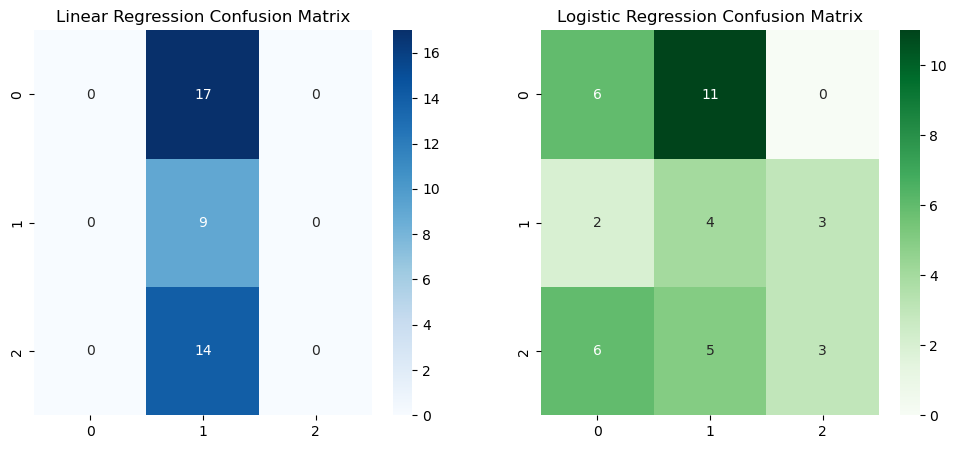

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(cm_lin, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Linear Regression Confusion Matrix")
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Logistic Regression Confusion Matrix")
plt.show()


In [41]:
print("!!!!! End of the program !!!!!!")

!!!!! End of the program !!!!!!
